<a href="https://colab.research.google.com/github/GreatLearningAIML1/bangalore-aug19-batch-vybhavsv/blob/master/R7_InternalLab_Questions_FMNIST_Simple_CNN_CIFAR_DATA_Augment_VYBHAV_SV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
print(x_train, y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [9 0 0 ... 3 0 5]


In [3]:
print(x_test, y_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [9 2 1 ... 8 1 5]


### Find dimensions of an image in the dataset

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
import numpy as np
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
import keras
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
#Normalizing the input
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [10]:
x_train[1,]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
x_train[1,]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078432],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.1882353 ],
        [0.16862746],
        [0.34117648],
        [0.65882355],
        [0.52156866],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215687],
        [0.53333336],
        [0.85882354],
        [0.84705883],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [14]:
#Initialize the model
model = Sequential()
input_shape = (28, 28, 1)
num_classes = 10
batch_size = 128

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))


#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
#optimizer = Adam(lr=0.001)
optimizer = 'adam'
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [17]:
#Training on the dataset
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          validation_data=(x_test, y_test),
          callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 8s 128us/step - loss: 0.4203 - acc: 0.8507 - val_loss: 0.3390 - val_acc: 0.8745
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2708 - acc: 0.9011 - val_loss: 0.2812 - val_acc: 0.9002
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2182 - acc: 0.9193 - val_loss: 0.2758 - val_acc: 0.8995
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1785 - acc: 0.9333 - val_loss: 0.2623 - val_acc: 0.9064
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1430 - acc: 0.9473 - val_loss: 0.2688 - val_acc: 0.9102
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1128 - acc: 0.9587 - val_loss: 0.2817 - val_acc: 0.9058
Epoch 7/10
60000/60000 [=

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [18]:
#Rebuild the model
model1 = Sequential()
input_shape = (28, 28, 1)
num_classes = 10
batch_size = 128

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model1.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model1.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model1.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model1.add(Dense(128, activation='relu',name='dense_1'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model1.add(Dense(num_classes, activation='softmax',name='dense_2'))

model1.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
___

In [0]:
# Compile new model
model1.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [20]:
#Training on the dataset on new model
model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          validation_data=(x_test, y_test),
          callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.4542 - acc: 0.8392 - val_loss: 0.3351 - val_acc: 0.8817
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2974 - acc: 0.8931 - val_loss: 0.2841 - val_acc: 0.8986
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2493 - acc: 0.9077 - val_loss: 0.2577 - val_acc: 0.9042
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2158 - acc: 0.9197 - val_loss: 0.2459 - val_acc: 0.9122
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1916 - acc: 0.9293 - val_loss: 0.2302 - val_acc: 0.9163
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1701 - acc: 0.9368 - val_loss: 0.2270 - val_acc: 0.9191
Epoch 7/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1508 - acc: 0.9440 - val_loss: 0.2231 - val_acc

In [21]:
loss_and_metrics = model1.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 54us/step
[0.06426038339411219, 0.9785833333333334]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

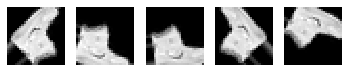

In [23]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [24]:
model1.fit_generator(datagen.flow(x_train, y_train,batch_size=128),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=20,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/20
  5/468 [..............................] - ETA: 15s - loss: 3.9124 - acc: 0.2141

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=20)`
  after removing the cwd from sys.path.


468/468 [==============================] - 15s 32ms/step - loss: 1.3933 - acc: 0.4859 - val_loss: 0.7648 - val_acc: 0.7108
Epoch 2/20
468/468 [==============================] - 15s 32ms/step - loss: 1.0218 - acc: 0.6264 - val_loss: 0.7614 - val_acc: 0.7185
Epoch 3/20
468/468 [==============================] - 15s 32ms/step - loss: 0.9247 - acc: 0.6641 - val_loss: 0.7989 - val_acc: 0.7136
Epoch 4/20
468/468 [==============================] - 15s 32ms/step - loss: 0.8539 - acc: 0.6909 - val_loss: 0.6298 - val_acc: 0.7775
Epoch 5/20
468/468 [==============================] - 15s 31ms/step - loss: 0.8043 - acc: 0.7056 - val_loss: 0.6277 - val_acc: 0.7687
Epoch 6/20
468/468 [==============================] - 15s 31ms/step - loss: 0.7770 - acc: 0.7156 - val_loss: 0.6768 - val_acc: 0.7600
Epoch 7/20
468/468 [==============================] - 15s 33ms/step - loss: 0.7531 - acc: 0.7271 - val_loss: 0.5852 - val_acc: 0.7918
Epoch 8/20
468/468 [==============================] - 15s 32ms/step - los

###  Report the final train and validation accuracy

In [25]:
loss_and_metrics = model1.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 56us/step
[0.48934387852748235, 0.82175]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import necessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [28]:
print(x_train, y_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [29]:
print(x_test, y_test)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

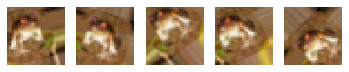

In [32]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()

[]

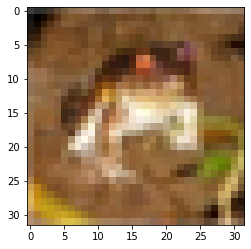

In [33]:
plt.imshow(x_train[0].squeeze().astype('uint8'), cmap='gray')
plt.plot()